## Laboratorio #3

Aprendizaje Profundo - CNN
Marco Ramirez - 21032
Josué Morales - 21116

In [1]:
import pickle
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
# Carga de Archivos
def load_data(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    return data

# Cargar los tres archivos
validacion = load_data('./validacion.p')
prueba = load_data('./prueba.p')
entrenamiento = load_data('./entrenamiento.p')

# Extraer las caracteristicas y etiquetas
X_train = entrenamiento['features']
y_train = entrenamiento['labels']

X_val = validacion['features']
y_val = validacion['labels']

X_test = prueba['features']
y_test = prueba['labels']

# Verificar las formas de los arrays
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_val shape: (4410, 32, 32, 3)
y_val shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


In [3]:
# Declaración de numero de clases
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  43
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [4]:
# Normalización de los datos
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [5]:
# One-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [6]:
# Creación del modelo
def createModel():
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model


In [7]:
# Instancia del modelo
model1 = createModel()
batch_size = 256
epochs = 20
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [9]:
history = model1.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/20
  1/136 [..............................] - ETA: 15s - loss: 3.7598 - accuracy: 0.0117

2024-08-15 08:39:49.397666: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


136/136 [==============================] - 5s 38ms/step - loss: 2.7622 - accuracy: 0.3016 - val_loss: 1.7517 - val_accuracy: 0.5218
Epoch 2/20
136/136 [==============================] - 5s 38ms/step - loss: 0.9997 - accuracy: 0.7267 - val_loss: 1.0001 - val_accuracy: 0.7340
Epoch 3/20
136/136 [==============================] - 5s 38ms/step - loss: 0.5749 - accuracy: 0.8451 - val_loss: 0.8016 - val_accuracy: 0.7932
Epoch 4/20
136/136 [==============================] - 5s 38ms/step - loss: 0.4063 - accuracy: 0.8932 - val_loss: 0.7915 - val_accuracy: 0.8113
Epoch 5/20
136/136 [==============================] - 5s 38ms/step - loss: 0.3131 - accuracy: 0.9189 - val_loss: 0.6810 - val_accuracy: 0.8469
Epoch 6/20
136/136 [==============================] - 5s 38ms/step - loss: 0.2553 - accuracy: 0.9346 - val_loss: 0.7020 - val_accuracy: 0.8410
Epoch 7/20
136/136 [==============================] - 5s 38ms/step - loss: 0.2189 - accuracy: 0.9436 - val_loss: 0.6501 - val_accuracy: 0.8601
Epoch 8/20

Text(0.5, 1.0, 'Accuracy Curves')

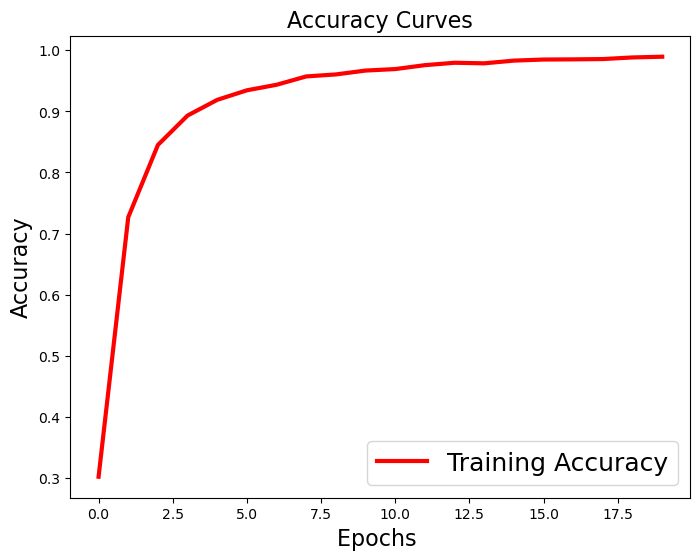

In [10]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Training Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [11]:
predictions = model1.predict(X_test)

395/395 [==============================] - 1s 3ms/step


In [12]:
model2 = createModel()
batch_size = 256
epochs = 30
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

history = model2.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/30
136/136 [==============================] - 6s 42ms/step - loss: 2.7510 - accuracy: 0.2948 - val_loss: 1.8075 - val_accuracy: 0.5279
Epoch 2/30
136/136 [==============================] - 6s 44ms/step - loss: 1.0806 - accuracy: 0.7018 - val_loss: 1.0711 - val_accuracy: 0.6971
Epoch 3/30
136/136 [==============================] - 5s 40ms/step - loss: 0.5642 - accuracy: 0.8468 - val_loss: 0.7839 - val_accuracy: 0.7948
Epoch 4/30
136/136 [==============================] - 5s 37ms/step - loss: 0.3776 - accuracy: 0.9017 - val_loss: 0.6338 - val_accuracy: 0.8395
Epoch 5/30
136/136 [==============================] - 5s 37ms/step - loss: 0.2872 - accuracy: 0.9271 - val_loss: 0.6133 - val_accuracy: 0.8467
Epoch 6/30
136/136 [==============================] - 5s 36ms/step - loss: 0.2273 - accuracy: 0.9435 - val_loss: 0.5981 - val_accuracy: 0.8630
Epoch 7/30
136/136 [==============================] - 5s 36ms/step - loss: 0.1878 - accuracy: 0.9534 - val_loss: 0.5417 - val_accuracy: 0.8658

Text(0.5, 1.0, 'Accuracy Curves')

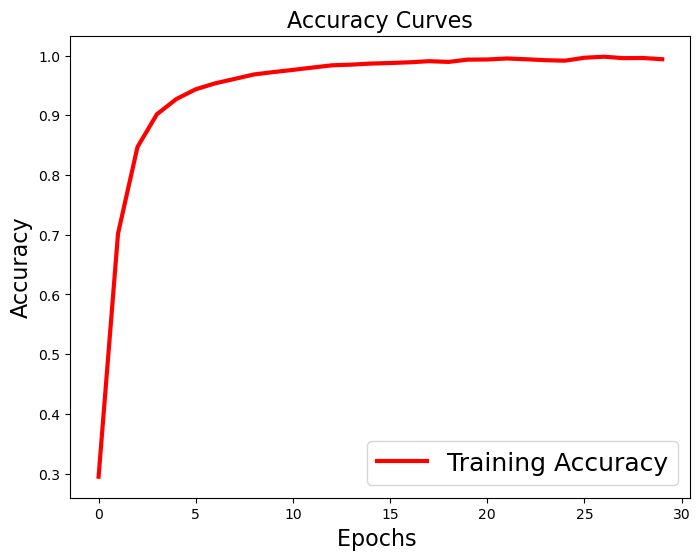

In [13]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Training Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [14]:
predictions = model2.predict(X_test)
accuracy = accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1))
precision = precision_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average='weighted')
recall = recall_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average='weighted')
f1 = f1_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

395/395 [==============================] - 1s 3ms/step
Accuracy: 0.9013460015835313
Precision: 0.9047566608354048
Recall: 0.9013460015835313
F1: 0.900387944951393


In [15]:
def createModel():
    model = Sequential()

    # Primera capa convolucional
    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Segunda capa convolucional
    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Tercera capa convolucional (opcional)
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Capas fully connected
    model.add(Flatten())
    model.add(Dense(120, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(84, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))

    return model

In [16]:
model3 = createModel()
batch_size = 256
epochs = 20
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

history = model3.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/20
136/136 [==============================] - 14s 100ms/step - loss: 4.1304 - accuracy: 0.3384 - val_loss: 4.4546 - val_accuracy: 0.1222
Epoch 2/20
136/136 [==============================] - 14s 100ms/step - loss: 1.6335 - accuracy: 0.7646 - val_loss: 3.6218 - val_accuracy: 0.2231
Epoch 3/20
136/136 [==============================] - 14s 100ms/step - loss: 0.8475 - accuracy: 0.8989 - val_loss: 1.4826 - val_accuracy: 0.6927
Epoch 4/20
136/136 [==============================] - 14s 101ms/step - loss: 0.5599 - accuracy: 0.9455 - val_loss: 0.5999 - val_accuracy: 0.9293
Epoch 5/20
136/136 [==============================] - 14s 101ms/step - loss: 0.4231 - accuracy: 0.9647 - val_loss: 0.4263 - val_accuracy: 0.9649
Epoch 6/20
136/136 [==============================] - 14s 101ms/step - loss: 0.3500 - accuracy: 0.9741 - val_loss: 0.3385 - val_accuracy: 0.9703
Epoch 7/20
136/136 [==============================] - 14s 101ms/step - loss: 0.3122 - accuracy: 0.9774 - val_loss: 0.3227 - val_ac

Text(0.5, 1.0, 'Accuracy Curves')

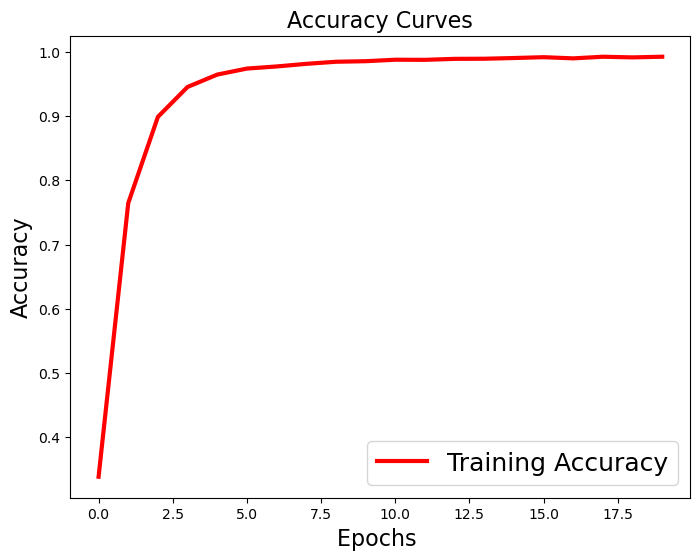

In [17]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Training Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [18]:
predictions = model3.predict(X_test)
accuracy = accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1))
precision = precision_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average='weighted')
recall = recall_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average='weighted')
f1 = f1_score(y_test.argmax(axis=1), predictions.argmax(axis=1), average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

395/395 [==============================] - 2s 6ms/step
Accuracy: 0.9600950118764846
Precision: 0.9634853897288574
Recall: 0.9600950118764846
F1: 0.9602874191113432
